$$\newcommand{\braket}[3]{\left\langle{#1}\middle|{#2}|{#3}\right\rangle}$$

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

## Example Notebook for Gauge invariance

This Notebook is based on the following [paper](https://science.sciencemag.org/content/367/6482/1128) of Markus Oberthaler

In [46]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame

%config InlineBackend.figure_format='retina'

The full quantum gate for the experiment:

<img width="200" height="300" src="Gates/Lattice_Gates.svg">

In [102]:
dev1 = qml.device('default.qubit', wires=2)

@qml.qnode(dev1)
def circuit(params):
    qml.RY(params, wires=0)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]

In [103]:
circuit(np.pi/2)
print(circuit.draw())

 0: ──RY(1.571)──┤ ⟨Z⟩ 
 1: ─────────────┤ ⟨Z⟩ 



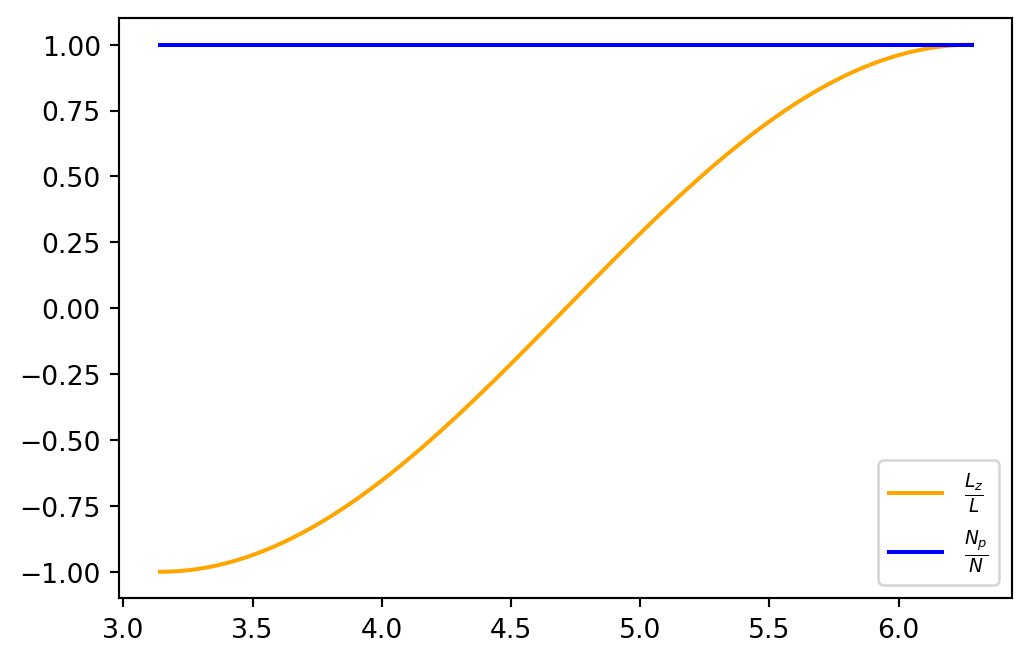

In [105]:
phis = np.linspace(np.pi, 2*np.pi, 100)

res = np.array([circuit(phi) for phi in phis])

plt.figure(dpi=96)
plt.plot(phis, res[:, 0], color="orange",  label=r"$\frac{L_z}{L}$")
plt.plot(phis, res[:, 1], color="blue", label=r"$\frac{N_p}{N}$")
plt.legend()
#plt.xlabel=

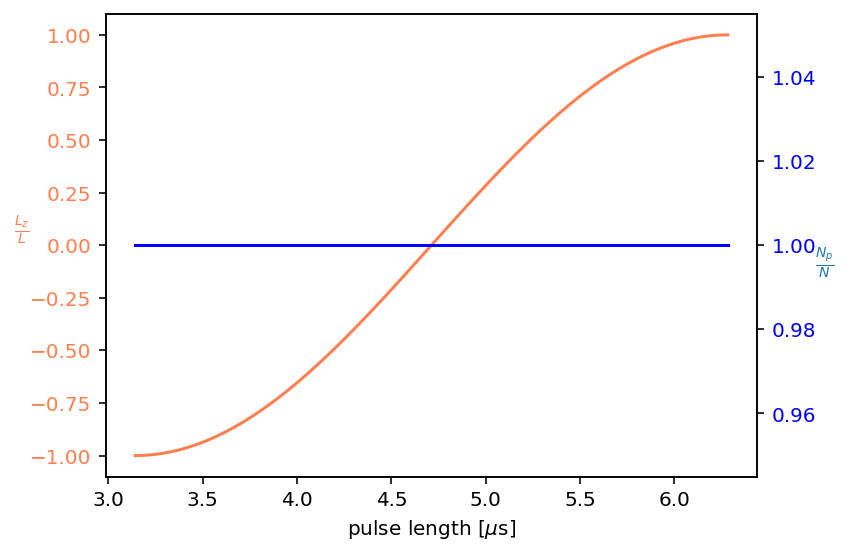

In [114]:
# Create some mock data

fig, ax1 = plt.subplots()

ax1.set_xlabel(r'pulse length [$\mu$s]')
ax1.set_ylabel(r"$\frac{L_z}{L}$", color="coral", rotation=0)
ax1.plot(phis, res[:, 0], color="coral",  label=r"$\frac{L_z}{L}$")
ax1.tick_params(axis='y', labelcolor="coral")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel(r"$\frac{N_p}{N}$", color=color, rotation=0) 
ax2.plot(phis, res[:, 1], color="blue", label=r"$\frac{N_p}{N}$")
ax2.tick_params(axis='y', labelcolor="blue")
#ax2.set_ylim(-0.01, 1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()